# Dimensionality Reduction
## Principal Components Analysis(PCA)

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

 When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.
 
 Principal Components Analysis(PCA)refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is an unsupervised approach, since it involves only a set of features X1, X2, . . . , Xp, and no associated response Y .
 
 Suppose that we wish to visualize n observations with measurements on a set of p features, X1, X2, . . . , Xp, as part of an exploratory data analysis. We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. If p is large, then it will certainly not be possible to look at all of them; moreover, most likely none of them will be informative since they each contain just a small fraction of the total information present in the data set. In particular, we would like to find a low-dimensional representation of the data that captures as much of the information as possible. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot the observations in this low-dimensional space.
 
***

There are two important outcames of PCA:

- It reduces number of dimensions in data.

- It shows which features explain the most variance in the data.

 PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the p features.

The first principal component of a set of features X1, X2, . . . , Xp is the normalized linear combination of the features that has the largest variance.

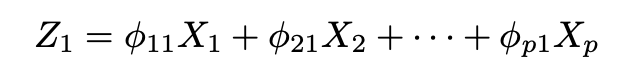

In [1]:
from IPython.display import Image 
pil_img = Image(filename='pca1.png')
display(pil_img)

Since we are only interested in variance, we assume that each of the variables in X has been centered to have mean zero (that is, the col- umn means of X are zero). We then look for the linear combination of the sample feature values of the form that has largest sample variance.

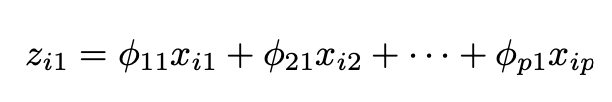

In [2]:
pil_img = Image(filename='pca2.png')
display(pil_img)

**Steps of PCA**

1. After Getting original data, calculate covariance matrix.

2. Calculate EigenVectors.

3. Sort EigenVectors by Eigenvalues.

4. Choose N largest EigenValues.

5. Project Original data onto EigenVectors.

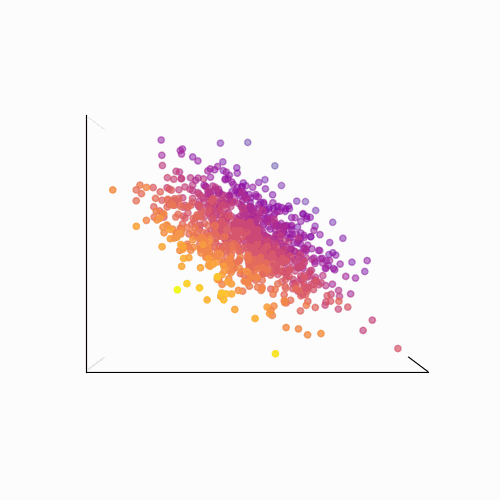

In [3]:
pil_img = Image(filename='pca3.gif.png')
display(pil_img)

## Implementation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

In [2]:
# path 
data_dict_path = './data-dictionary.csv'
country_path = './Country-data.csv'

In [3]:
# read csv files
dict_df = pd.read_csv(data_dict_path)
df = pd.read_csv(country_path)

In [4]:
# first few rows of dictionary dataset
dict_df.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [5]:
# first few rows of countrty dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# shape of dataset
df.shape

(167, 10)

In [7]:
#some basic info
df.info()
print(50*'-')
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory

In [8]:
#some basic statistical data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
#null value 
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
#null value
dict_df.isnull().sum()

Column Name    0
Description    0
dtype: int64

Let's see the number of unique countries present in our dataset

In [11]:
#number of unique countries
df['country'].nunique()

167

As we are going to use Unsupervised learning technique we don't need the country column here.So we are going to drop it

In [12]:
#drop country column
data=df.drop(['country'],axis=1)

In [13]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

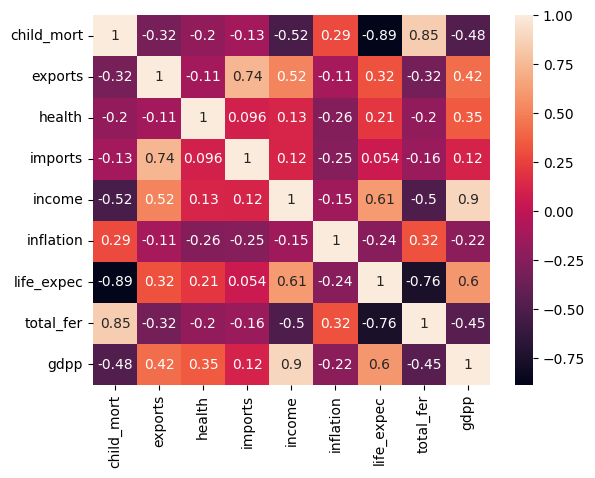

In [14]:
#correlation 
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

From above we can conclude that:<br>

1. gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated<br>
2. whereas life_expec and child_mort are highly negative correlated

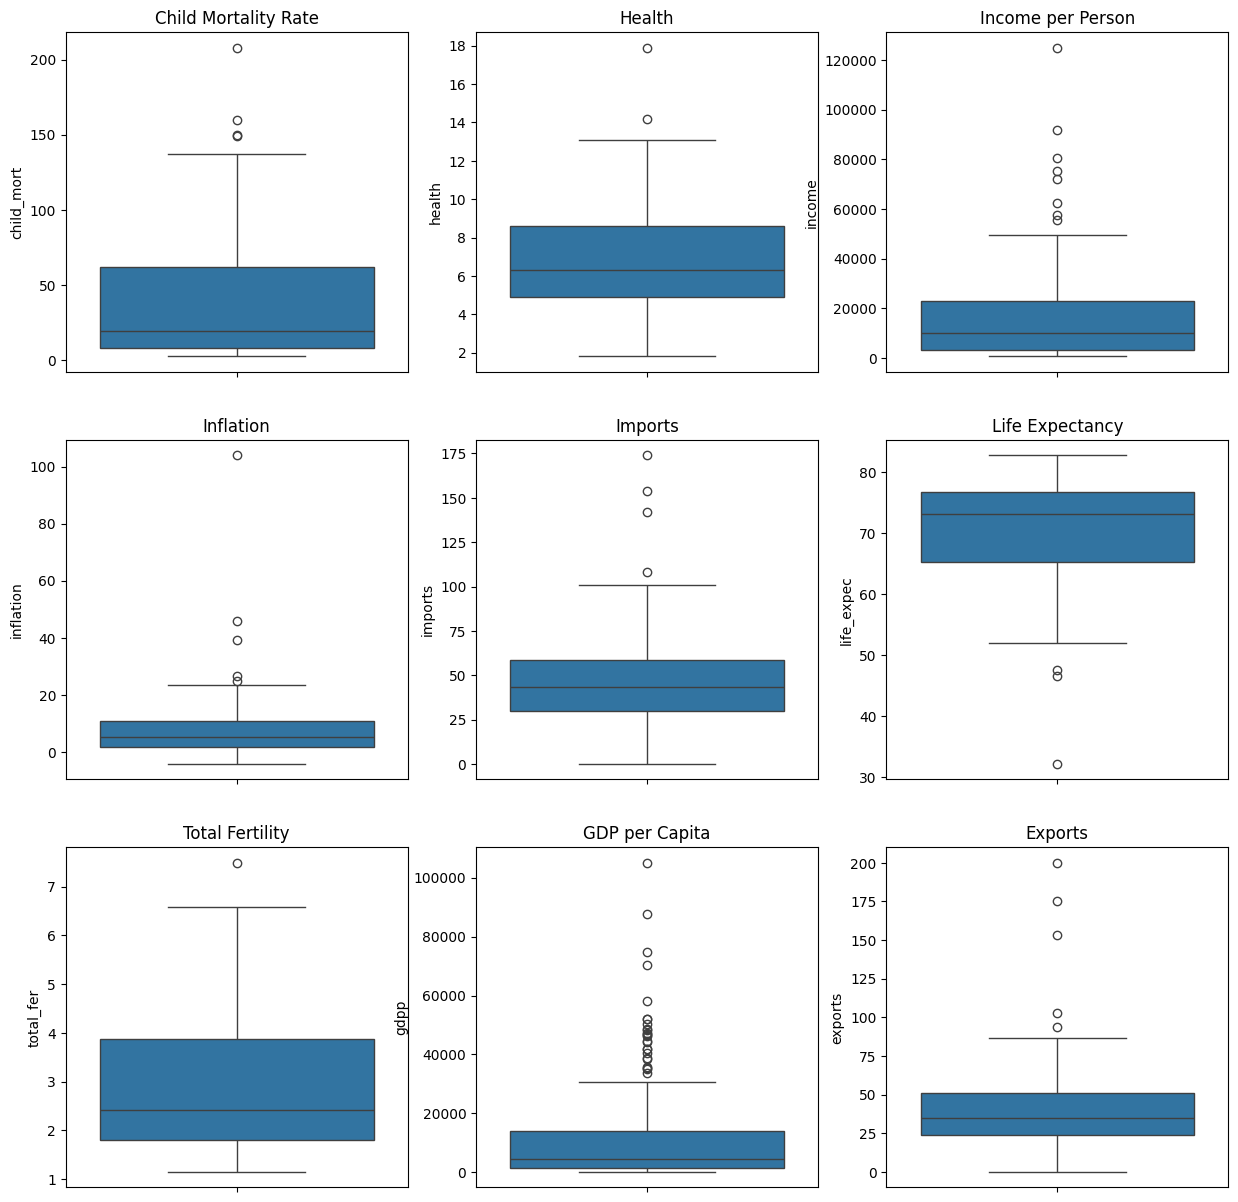

In [15]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

From above box-plots we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)

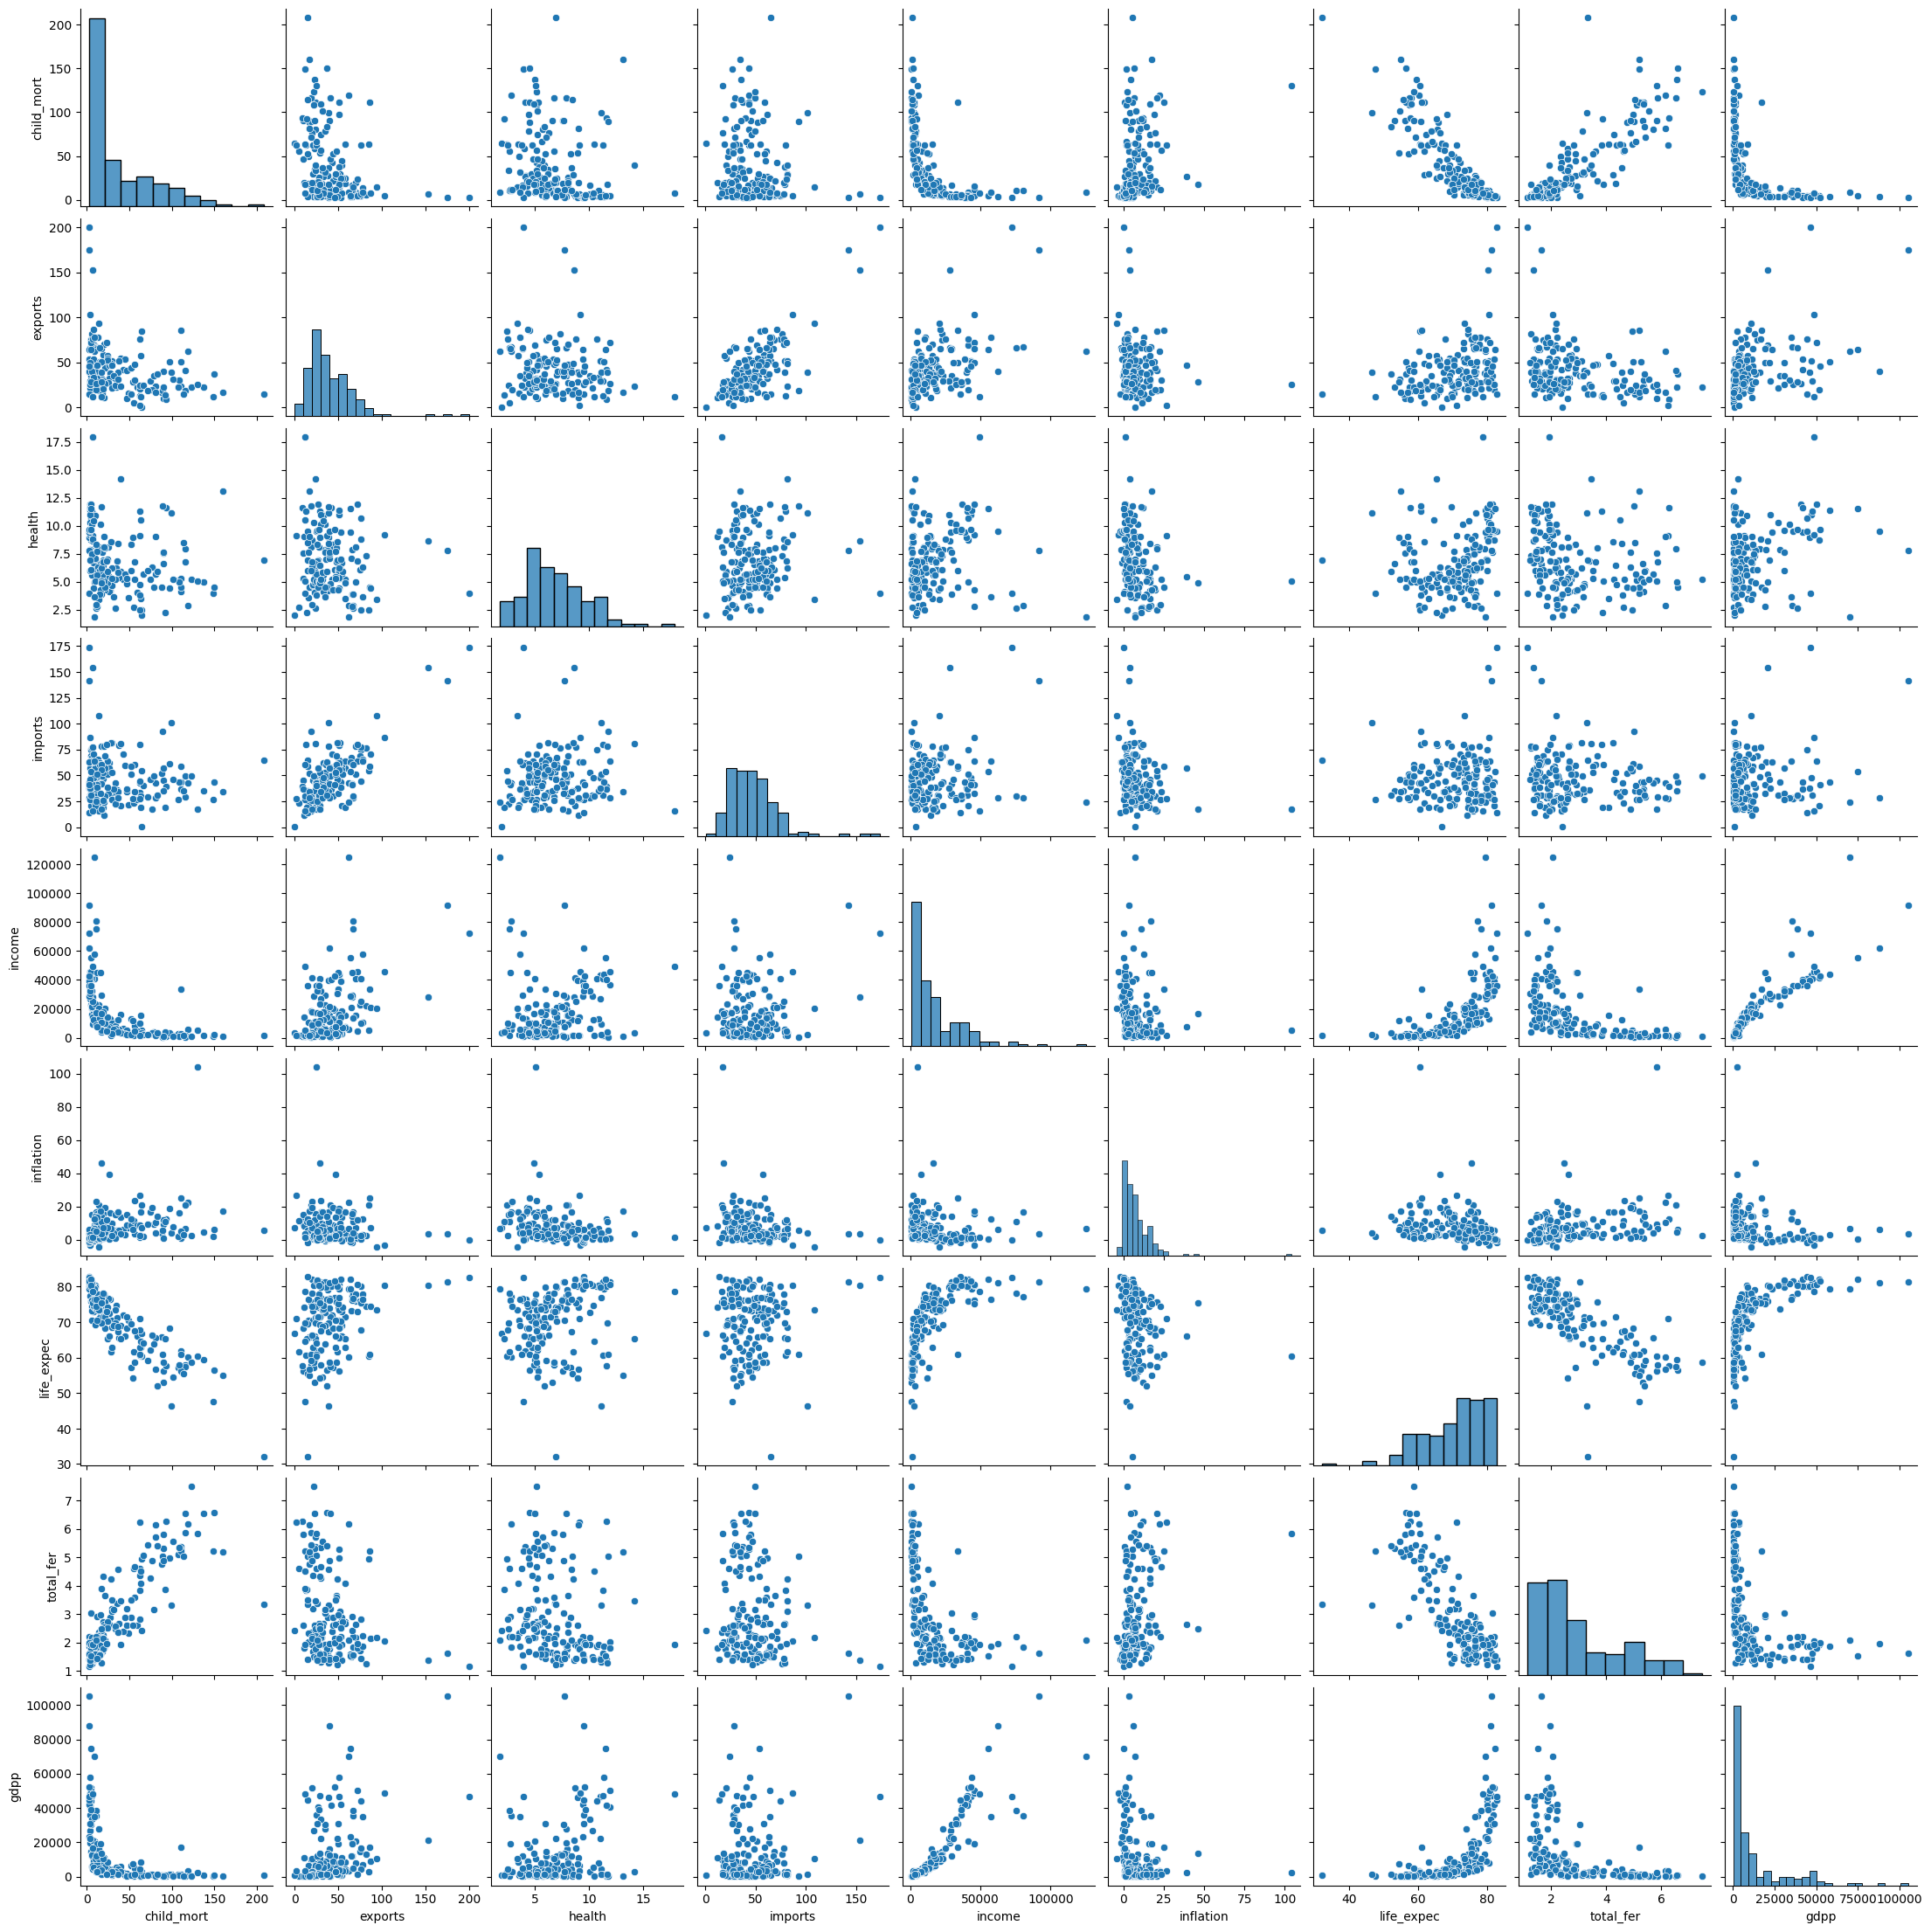

In [16]:
sns.pairplot(df)

# Scaling data

Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library<br>
**StandardScaler** transform the data such the the mean will be 0 and variance will be 1.

**Note:-** Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [17]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

In [18]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# PCA

In [19]:
pca = PCA(svd_solver='randomized', random_state=42, n_components=9).fit(scaled_df)
exp = pca.explained_variance_ratio_

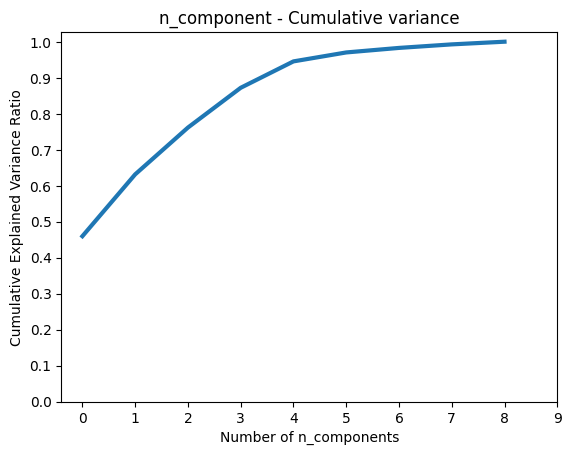

In [20]:
plt.plot(np.cumsum(exp), linewidth=3)
plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, 10, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [21]:
n = 1
for component in pca.components_ :
    print('n_component = ', n)
    print(component)
    print('_'*50)
    n+=1

n_component =  1
[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
  0.42583938 -0.40372896  0.39264482]
__________________________________________________
n_component =  2
[ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
 -0.22270674  0.15523311 -0.0460224 ]
__________________________________________________
n_component =  3
[-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
  0.11391854  0.01954925  0.12297749]
__________________________________________________
n_component =  4
[ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
 -0.20379723  0.37830365  0.53199457]
__________________________________________________
n_component =  5
[-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
  0.1082198  -0.13526221 -0.18016662]
__________________________________________________
n_component =  6
[ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
 -0.60112652 -0.

In [25]:
# We use n_component=5
pca_df = pd.DataFrame({
    'Features' : data.columns,
    'PC1' : pca.components_[0], 
    'PC2' : pca.components_[1], 
    'PC3' : pca.components_[2], 
    'PC4' : pca.components_[3], 
    'PC5' : pca.components_[4],
})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


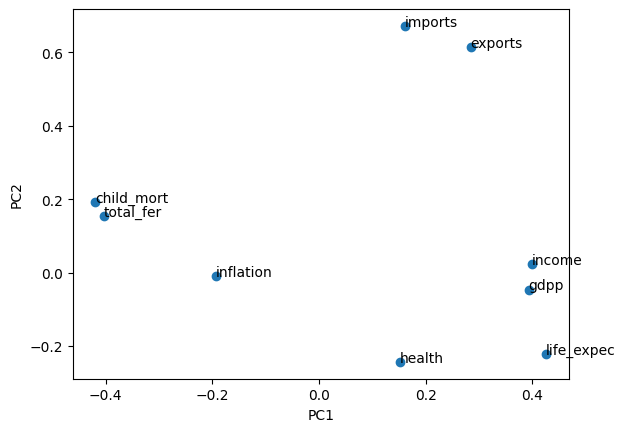

In [26]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(pca_df.Features):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.show()

## Performing Incremental PCA

In [28]:
# Finally let's go ahead and do dimenstionality reduction using the four Principal Components
pca_final = IncrementalPCA(n_components=5)
df_pca = pca_final.fit_transform(scaled_df)

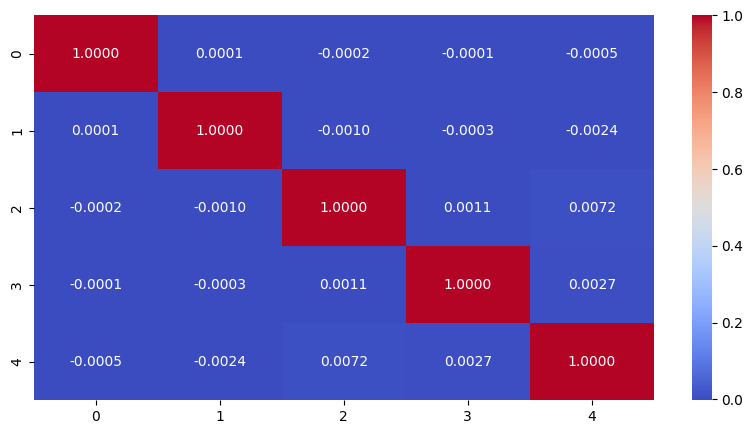

In [29]:
# Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

# Creating correlation matrix for the principal components
corrmat = np.corrcoef(pc)

# Plotting the correlation matrix of the principal components
plt.figure(figsize = (10,5))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', fmt='.4f', linecolor='white')
plt.show()

In [30]:
# Creating the dataframe of all 5 principal components
pcs_df2 = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
pcs_df2

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025
164,0.498570,1.392777,-0.252849,-1.085037,1.156471
165,-1.887294,-0.105397,1.107639,0.062636,0.665467


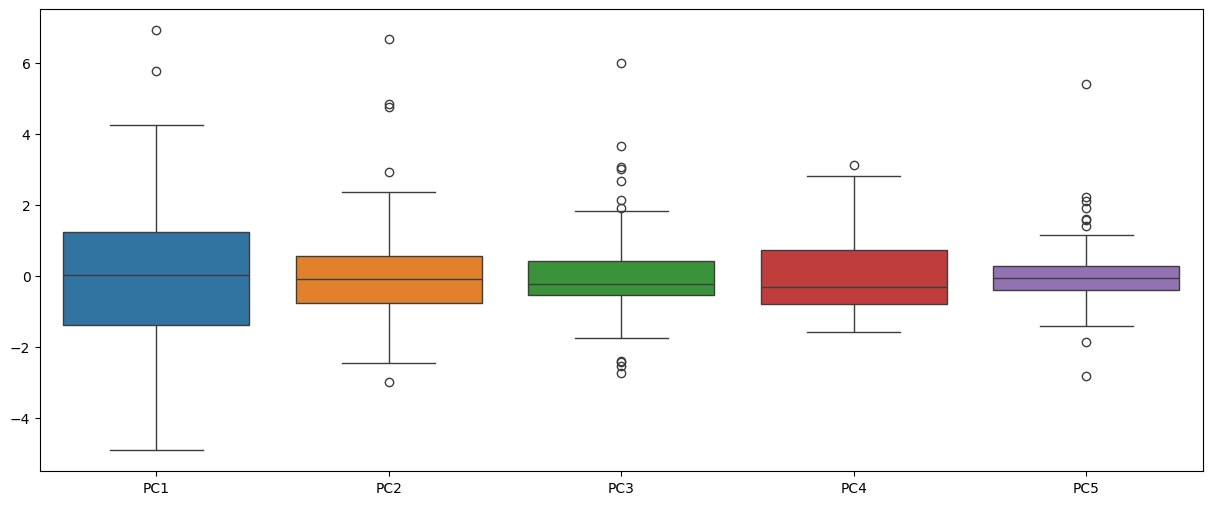

In [31]:
fig = plt.figure(figsize = (15,6))
sns.boxplot(data=pcs_df2)
plt.show()

In [32]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
